In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
#input_file = "../../rs_usage/metadata/metadata.csv"
#metadata = pd.read_csv(input_file, low_memory=False)
#metadata.set_index('Unnamed: 0', inplace=True)
#license = metadata["license"]
#with open('../data/license.npy', 'wb') as f:
#    np.save(f, license.values)

In [17]:
blue = "#005AB5"
red = "#DC3220"

In [18]:
permissive_licenses = [
    "Academic Free License v3.0",
    "Apache License 2.0",
    "Artistic License 2.0",
    "BSD 2-Clause \"Simplified\" License",
    "BSD 3-Clause \"New\" or \"Revised\" License",
    "BSD 3-Clause Clear License",
    "BSD 4-Clause \"Original\" or \"Old\" License",
    "BSD Zero Clause License",
    "Boost Software License 1.0",
    "Creative Commons Zero v1.0 Universal",
    "Do What The F*ck You Want To Public License",
    "ISC License",
    "MIT License",
    "MIT No Attribution",
    "The Unlicense",
    "University of Illinois/NCSA Open Source License",
    "Vim License",
    "zlib License"
]


Unnamed: 0
136495      0
136496      9
136497      3
136498      1
136499      0
         ... 
61347     102
61348      10
61349      71
61350      70
61351       0
Name: forks_count, Length: 52684, dtype: int64

In [19]:
license = np.load('../data/license.npy', allow_pickle=True)
license = np.where(pd.isnull(license), 'NA', license)
licences_types, count = np.unique(license, return_counts=True)
licences_types = licences_types[np.argsort(count)]
count = np.sort(count)
colors = np.asarray([blue if v in permissive_licenses else "gray" if v=="NA" else red
                     for v in licences_types])


In [20]:
len(license)

52684

In [6]:
permissive_count = 0
non_permissive_count = 0
na = 0
for i, v in enumerate(licences_types):
    if v in permissive_licenses:
        permissive_count += count[i]
    elif v=="NA":
        na += count[i]
    else:
        non_permissive_count += count[i]

In [7]:
colors = {
    "Permissive": blue,
    "Non Permissive": red,
    "NA": "grey"
}

df = pd.DataFrame(columns=["is_permissive", "name"])
df["name"] = licences_types
df["count"] = count
df["is_permissive"] = df["name"].apply(lambda x: "Permissive" if x in permissive_licenses else "Non Permissive")
df.loc[df["name"].isin(["NA", "Other"]), "is_permissive"] = "NA"
df_sorted = df.sort_values("count", ascending=True)
df_sorted["color"] = df_sorted["is_permissive"].map(colors)



([<matplotlib.patches.Wedge at 0x12e284df0>,
 [Text(-0.5920036230628967, 0.927109330273622, 'NA'),
  Text(-0.11144902275816022, -1.0943395795301618, 'Non Permissive'),
  Text(0.8623585947049307, -0.6828891960915309, 'Permissive')])

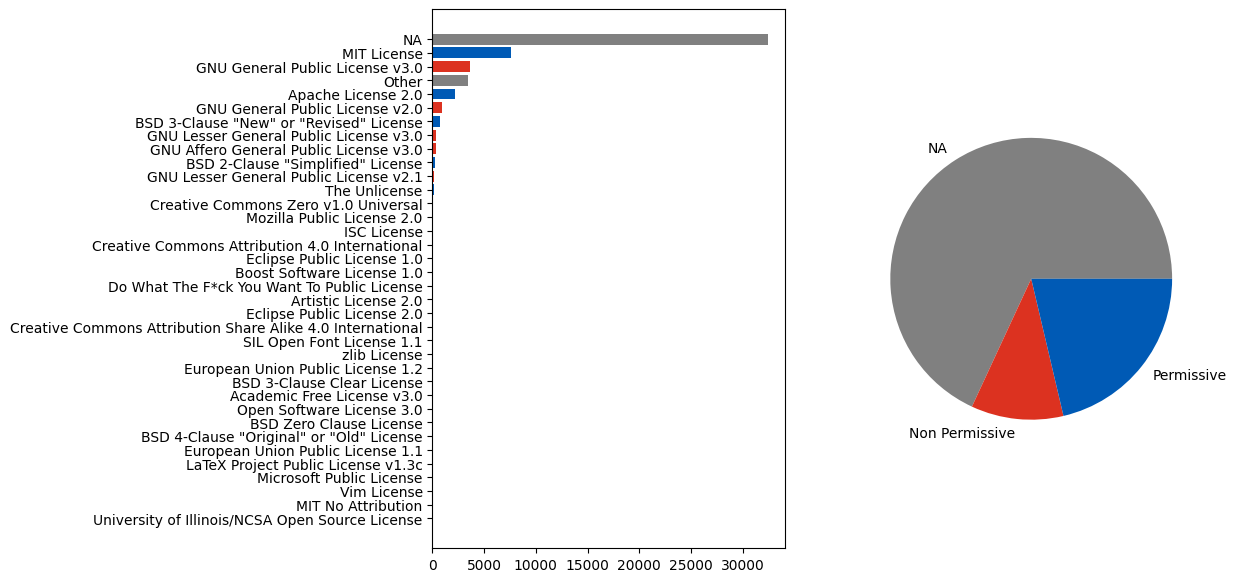

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

axs[0].barh(y=df_sorted["name"], width=df_sorted["count"], color=df_sorted["color"])

labels = ["Permissive", "Non Permissive", "NA"]
type_counts = df_sorted.groupby('is_permissive').sum(numeric_only = True)
type_counts["color"] = type_counts.index.map(colors)

axs[1].pie(type_counts["count"], labels=type_counts.index, colors=type_counts["color"])